> PROBLEMA DE NEGÓCIO:
- Aqui o objetivo é analisar dados sobre os games disponíveis na Google PlayStore
- **Dataset**: dataset4

## Instalando e Carregando os Pacotes

In [3]:
# Imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

> Caso não tenha  biblioteca do plotly instada, usa-se: !pip install plotly

In [4]:
# Carregando dados
dados = pd.read_csv("dados/dataset4.csv")

In [5]:
dados.shape

(1730, 15)

In [6]:
dados.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


**Visualizando o número de instalações** (como faremos algumas transformações com uma determinada variável, faremos uma cópia do dataset original)

In [8]:
dados_copy = dados.copy()

In [9]:
dados_copy['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

> Aqui vamos criar um dicionário para converter o número de instalações que é categórica, em um número inteiro para utilizar na análise

In [10]:
install_range = {'500.0 M': 500000000, 
                 '100.0 M': 100000000, 
                 '50.0 M': 50000000, 
                 '10.0 M': 10000000, 
                 '5.0 M': 5000000, 
                 '1.0 M': 1000000,
                 '1000.0 M': 1000000000 , 
                 '500.0 k': 500000, 
                 '100.0 k': 1000000
                 }

In [11]:
# Inserindo o número de instalações em uma coluna criada no dataframe
dados_copy['Installs_num'] = dados_copy['installs'].map(install_range)

In [12]:
dados_copy

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,Installs_num
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,Piknik Słowo - Word Snack,122845,1.0 M,4.67,0.1,0.3,0.0,GAME WORD,96954,17233,5098,1249,2309,False,1000000
1726,97,Wordox – Free multiplayer word game,120476,1.0 M,4.21,0.0,0.1,0.0,GAME WORD,74010,21546,10648,4710,9560,False,1000000
1727,98,4 Fotos 1 Palavra,114852,5.0 M,4.52,0.3,0.6,0.0,GAME WORD,84688,16783,6619,1867,4892,False,5000000
1728,99,زوايا - لعبة ستحرك زوايا عقلك,110293,1.0 M,4.76,0.8,1.9,0.0,GAME WORD,99168,3528,3258,1059,3278,False,1000000


> Aqui faremos um agrupamento por categoria

In [13]:
total_install_cat = dados_copy.groupby('category')['Installs_num'].sum().sort_values(ascending= False)

In [14]:
total_install_cat

category
GAME ARCADE          6931000000
GAME CASUAL          6847000000
GAME ACTION          6650000000
GAME RACING          4640000000
GAME PUZZLE          3631000000
GAME SPORTS          3491000000
GAME SIMULATION      2871000000
GAME STRATEGY        2392000000
GAME BOARD           2038000000
GAME ADVENTURE       1888000000
GAME EDUCATIONAL     1595500000
GAME ROLE PLAYING    1449000000
GAME CARD            1401000000
GAME WORD            1385000000
GAME MUSIC           1286500000
GAME CASINO           788500000
GAME TRIVIA           705000000
Name: Installs_num, dtype: int64

#### 01 - Gráfico de barras com o total de games e de instalações por categoria

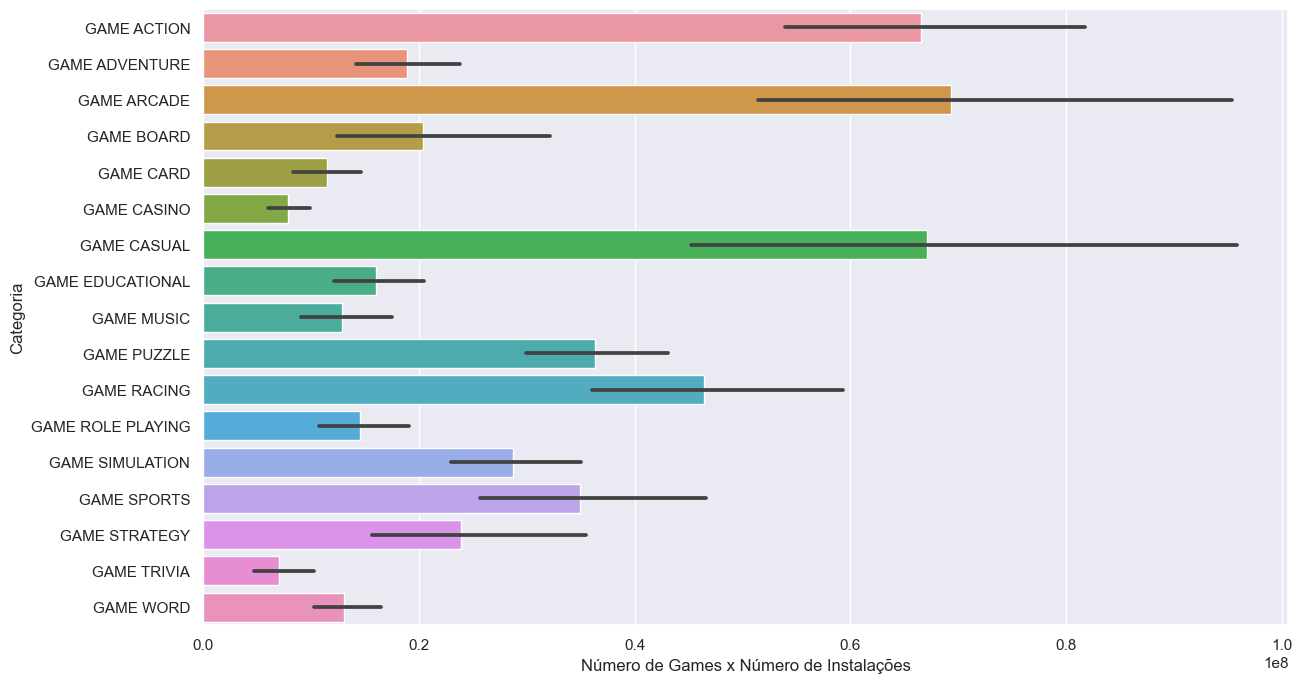

In [15]:
plt.figure(figsize= (14, 8))
sns.barplot(x = 'Installs_num', y = 'category', data = dados_copy)
plt.xlabel('Número de Games x Número de Instalações')
plt.ylabel('Categoria')
plt.show()

> Nesse gráfico notamos algumas particularidades:
- Não usamos paleta de cores, mas o seaborn se encarregou de classificá-las
- Usamos o gráfico na horizontal devido ao alto número de barras (categorias)
- As barras coloridas são os números de categorias, as linhas são os números de instalações

#### 02 - Pie Chart com o percentual de games por categoria

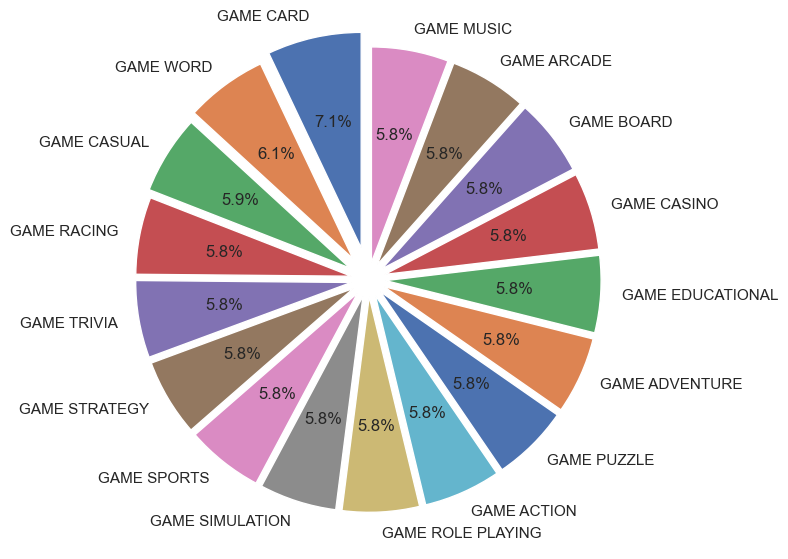

In [16]:
plt.figure(figsize = (14,7))
cat_labels = dados_copy['category'].value_counts().index
plt.pie(dados_copy['category'].value_counts().values, 
        labels = cat_labels, 
        autopct = '%1.1f%%', 
        startangle = 90,  # indica o ângulo de início do gráfico
        explode = [0.15, 0.12, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08])
plt.show()

> O gráfico de pizza que geralmente é controverso, fico mais apresentável com o uso do 'startangle' para diferenciar o alinhamento das fatias e o 'explode' para o tratmento destas

#### 03 - Sunburst com os 20 primeiros games com: categoria, média de avaliação e se é pago ou gratuito

> Trata-se de um gráfico que exige uma interpretação mais avançada:
- Cores: representam a quantidade, quanto mais próxima do amarelo, melhor a média de avaliação
- A última parte da fatia representa se é pago ou não (True e False)
- A parte do meio representa a categoria

In [17]:
dados_copy['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [18]:
dados_copy.head(20)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,Installs_num
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000
5,6,Shadow Fight 2,14048931,100.0 M,4.57,0.6,1.5,0.0,GAME ACTION,11532143,961926,448184,217044,889631,False,100000000
6,7,Call of Duty®: Mobile - Day of Reckoning,13020115,100.0 M,4.47,2.8,5.1,0.0,GAME ACTION,10079925,1210326,488294,261610,979958,False,100000000
7,8,Among Us,11298789,100.0 M,3.65,6.3,12.3,0.0,GAME ACTION,6173970,1026476,770574,614021,2713745,False,100000000
8,9,Temple Run 2,9554877,500.0 M,4.21,0.3,0.6,0.0,GAME ACTION,6521348,996144,615544,343978,1077860,False,500000000
9,10,PUBG MOBILE LITE,7392911,100.0 M,4.16,1.3,2.9,0.0,GAME ACTION,5231571,494013,343880,232468,1090976,False,100000000


In [19]:
# Dataviz 29
px.sunburst(dados_copy.head(20), 
            path = ['title', 'category', 'paid'], 
            values = 'average rating', 
            color = 'average rating')

# Fim